In [1]:
import pandas as pd  
import seaborn as sns 


In [9]:
dataSet = sns.load_dataset("titanic")  # load tge dataset
dataSet

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
dataSet.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<h5>Preprocessing</h5>

In [16]:
dataSet.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<h5>Feature Selection & Target Definition:</h5>

In [42]:
X = dataSet[["pclass", "sex","age","fare","embarked"]].copy()
y = dataSet["survived"]

<h5>Encoding Categorical Data:</h5>

In [45]:
X = pd.get_dummies(X,drop_first=True) #Converts sex and embarked into numeric 

In [47]:
X

,pclass,age,fare,sex_male,embarked_Q,embarked_S
0,3,22.0,7.2500,True,False,True
1,1,38.0,71.2833,False,False,False
2,3,26.0,7.9250,False,False,True
3,1,35.0,53.1000,False,False,True
4,3,35.0,8.0500,True,False,True
...,...,...,...,...,...,...
886,2,27.0,13.0000,True,False,True
887,1,19.0,30.0000,False,False,True
888,3,NaN,23.4500,False,False,True
889,1,26.0,30.0000,True,False,False


In [49]:
X["age"] = X["age"].fillna(X["age"].median())
X = X.dropna()
y = y[X.index]



In [55]:
X.isnull().sum()

pclass        0
age           0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                                    test_size=0.2, # 20% data will be used for testing
                                                    random_state=42,  # For reproducibility
                                                    stratify=y)      # Keeps the class distribution same in train & test


In [63]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8268156424581006
Confusion Matrix:
 [[96 14]
 [17 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



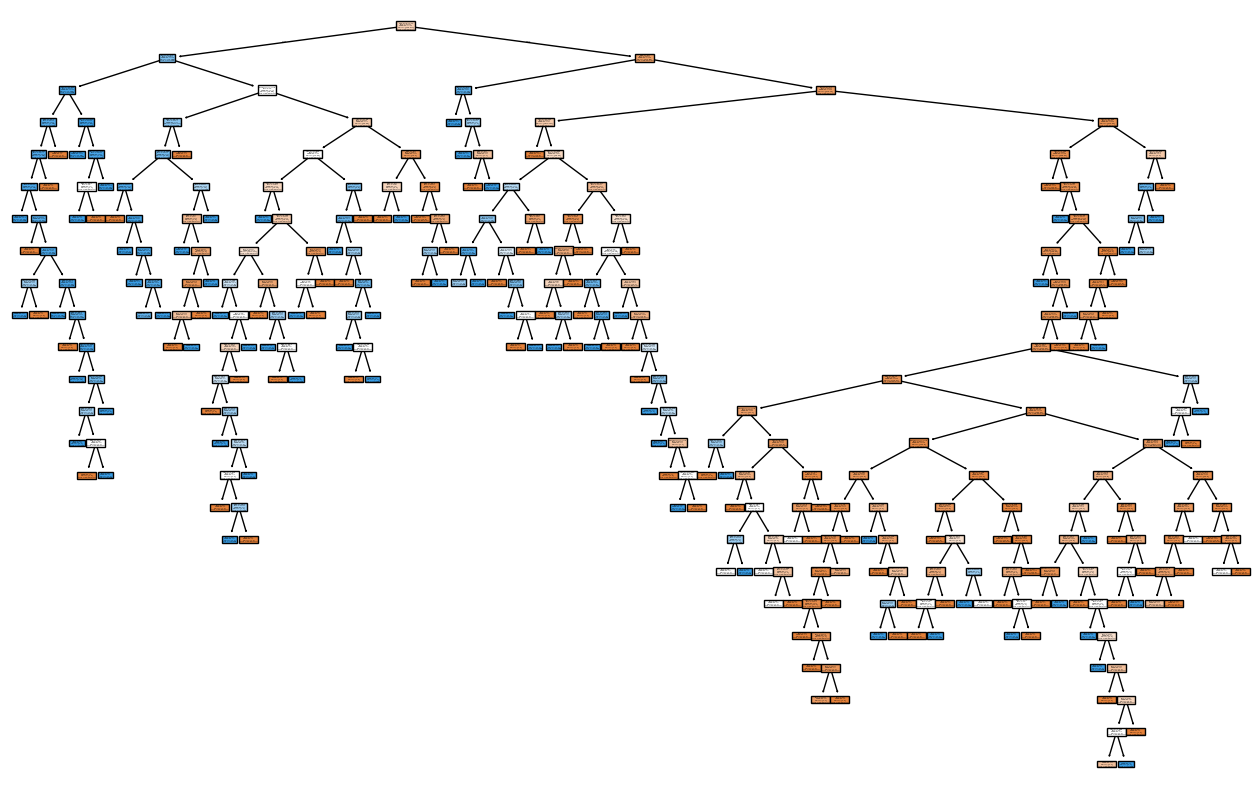

In [67]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()


🎯 Goal:
This model predicts whether a passenger survived or not (Survived = 0 or 1) on the Titanic using their personal and travel details.

🤖 How the Model Works
You're using a Decision Tree Classifier, which is a machine learning model that makes decisions like a flowchart. It asks questions like:

"Was the passenger female?"

"Was their ticket class 1st?"

"Was their fare above a certain amount?"

"Was the passenger older than 40?"

Based on these questions and their answers, the model splits the data into branches and makes a prediction at the end.

📊 Input Features (X):
These are the columns the model uses to learn:

pclass (ticket class: 1st, 2nd, 3rd)

sex (male or female)

age

fare (ticket fare)

embarked (port of boarding)

These features are processed (cleaned and encoded) before training.

🎓 What the Model Learns:
The Decision Tree learns patterns from the data — for example:

Most females in 1st class survived

Most males in 3rd class did not

Children and passengers who paid high fares had better chances of survival

✅ What the Model Can Do for You:
Predict survival for a new/passenger based on their features

Help you understand which factors were most important in determining survival

Visualize the model like a decision flowchart, which makes it highly explainable

